In [ ]:
# Eda analysis 

In [2]:
#load libraries
#pip install pandas
import pandas as pd
#pip install openpyxl
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


In [3]:
merged_df= pd.read_csv("C:/Users/sarad/Desktop/Project work_final/Data/Cleaned_merged_df.csv")
merged_df.head()

,BENE_ID,CLM_ID,CLM_ADMSN_DT,NCH_BENE_DSCHRG_DT,ICD_DGNS_CD1,ICD_DGNS_CD2,ICD_DGNS_CD3,ICD_DGNS_CD4,ICD_DGNS_CD5,ICD_DGNS_CD6,...,ICD_DGNS_CD24,ICD_DGNS_CD25,SEX_IDENT_CD,BENE_RACE_CD,ENTLMT_RSN_CURR,STATE_CNTY_FIPS_CD_01,STATE_CNTY_FIPS_CD_02,AGE_GROUP,ER_VISIT,LOS
0,10000010254618,10000930037831,2015-03-25,2015-03-25,NonCronic,NonCronic,Hyperlipidemia (HLP),NonCronic,Diabetes Mellitus (DM),Anemia,...,NonCronic,NonCronic,1,White,DIB,1101,1101,21-30,1,0
1,10000010254653,10000930038030,2015-09-24,2015-09-24,NonCronic,NonCronic,Breast Cancer,NonCronic,NonCronic,NonCronic,...,NonCronic,NonCronic,2,White,DIB,1081,1081,31-40,1,0
2,10000010254653,10000930038031,2017-05-09,2017-05-10,NonCronic,NonCronic,Breast Cancer,NonCronic,NonCronic,NonCronic,...,NonCronic,NonCronic,2,White,DIB,1081,1081,31-40,0,1
3,10000010254656,10000930038162,2017-01-14,2017-01-14,NonCronic,NonCronic,NonCronic,NonCronic,NonCronic,NonCronic,...,NonCronic,NonCronic,2,White,DIB,1073,1073,21-30,1,0
4,10000010254656,10000930038162,2017-01-14,2017-01-14,NonCronic,NonCronic,NonCronic,NonCronic,NonCronic,NonCronic,...,NonCronic,NonCronic,2,White,DIB,1073,1073,21-30,1,0


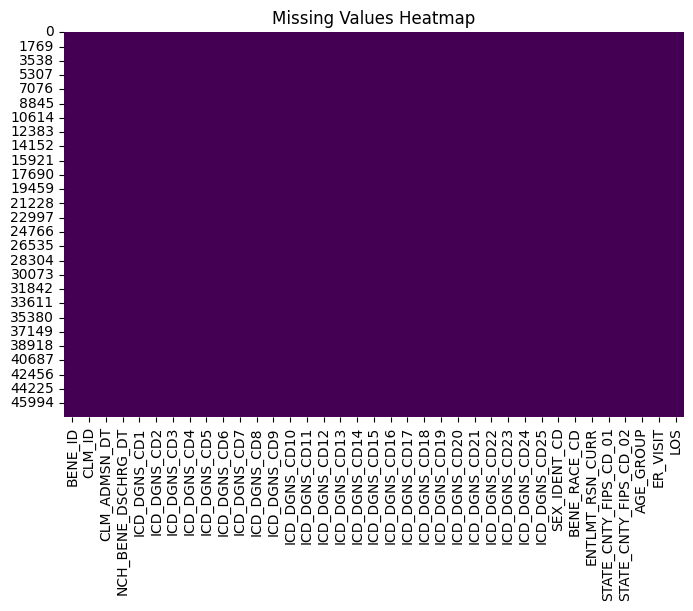

In [4]:
# Visualize the missing data using heatmap
# Count of Missing Values
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(8, 5))
sns.heatmap(merged_df.isnull(), cmap="viridis", cbar=False)
plt.title("Missing Values Heatmap")
plt.show()

There is no mising values in the target variable ER_VISIT and Length of stay(LOS) variable. So, we can proceed with the analysis.

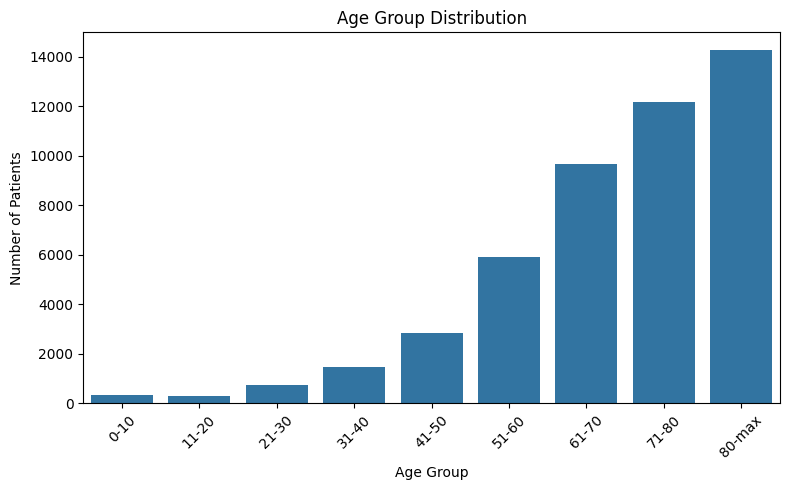

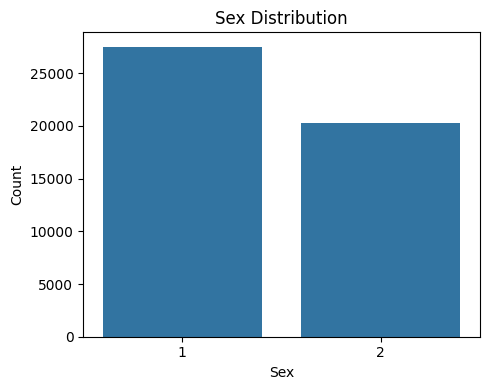

In [5]:
# Categorical Distribution (AGE_GROUP, SEX_IDENT_CD, etc.)
# Age group plot 
plt.figure(figsize=(8, 5))
sns.countplot(
    data=merged_df,
    x='AGE_GROUP',
    order=['0-10','11-20','21-30','31-40','41-50','51-60','61-70','71-80','80-max']
)
plt.title('Age Group Distribution')
plt.xlabel('Age Group')
plt.ylabel('Number of Patients')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Sex distribution
plt.figure(figsize=(5, 4))
sns.countplot(data=merged_df, x='SEX_IDENT_CD')
plt.title('Sex Distribution')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.tight_layout()
plt.show()


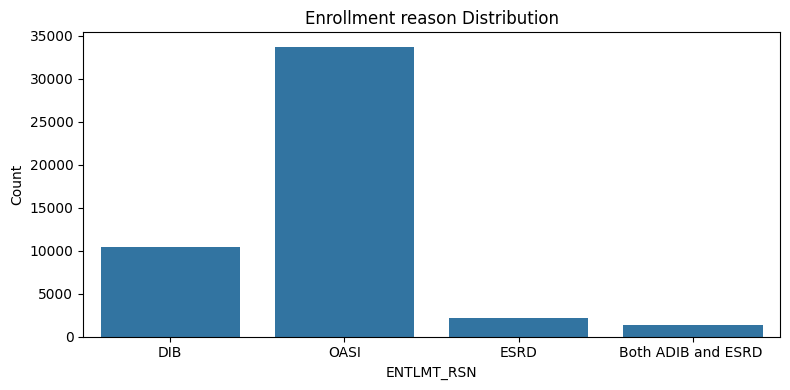

In [6]:
# Enrollment reason code distribution
plt.figure(figsize=(8, 4))
sns.countplot(data=merged_df, x='ENTLMT_RSN_CURR')
plt.title('Enrollment reason Distribution')
plt.xlabel('ENTLMT_RSN')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

# ENTLMT_RSN_CURR: Current Reason for Entitlement Code
0 = Old age and survivor’s insurance (OASI)
1 = Disability insurance benefits (DIB)
2 = End-stage renal disease (ESRD)
3 = Both DIB and ESRD

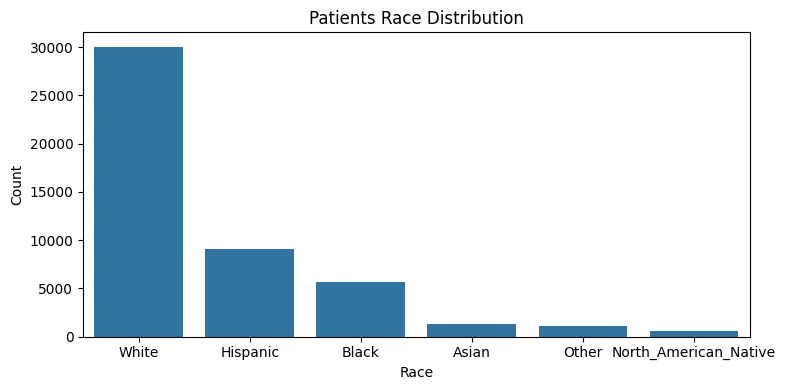

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Get ordered list of races by count
race_order = merged_df['BENE_RACE_CD'].value_counts().index

# Plot
plt.figure(figsize=(8, 4))
sns.countplot(data=merged_df, x='BENE_RACE_CD', order=race_order)
plt.title('Patients Race Distribution')
plt.xlabel('Race')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

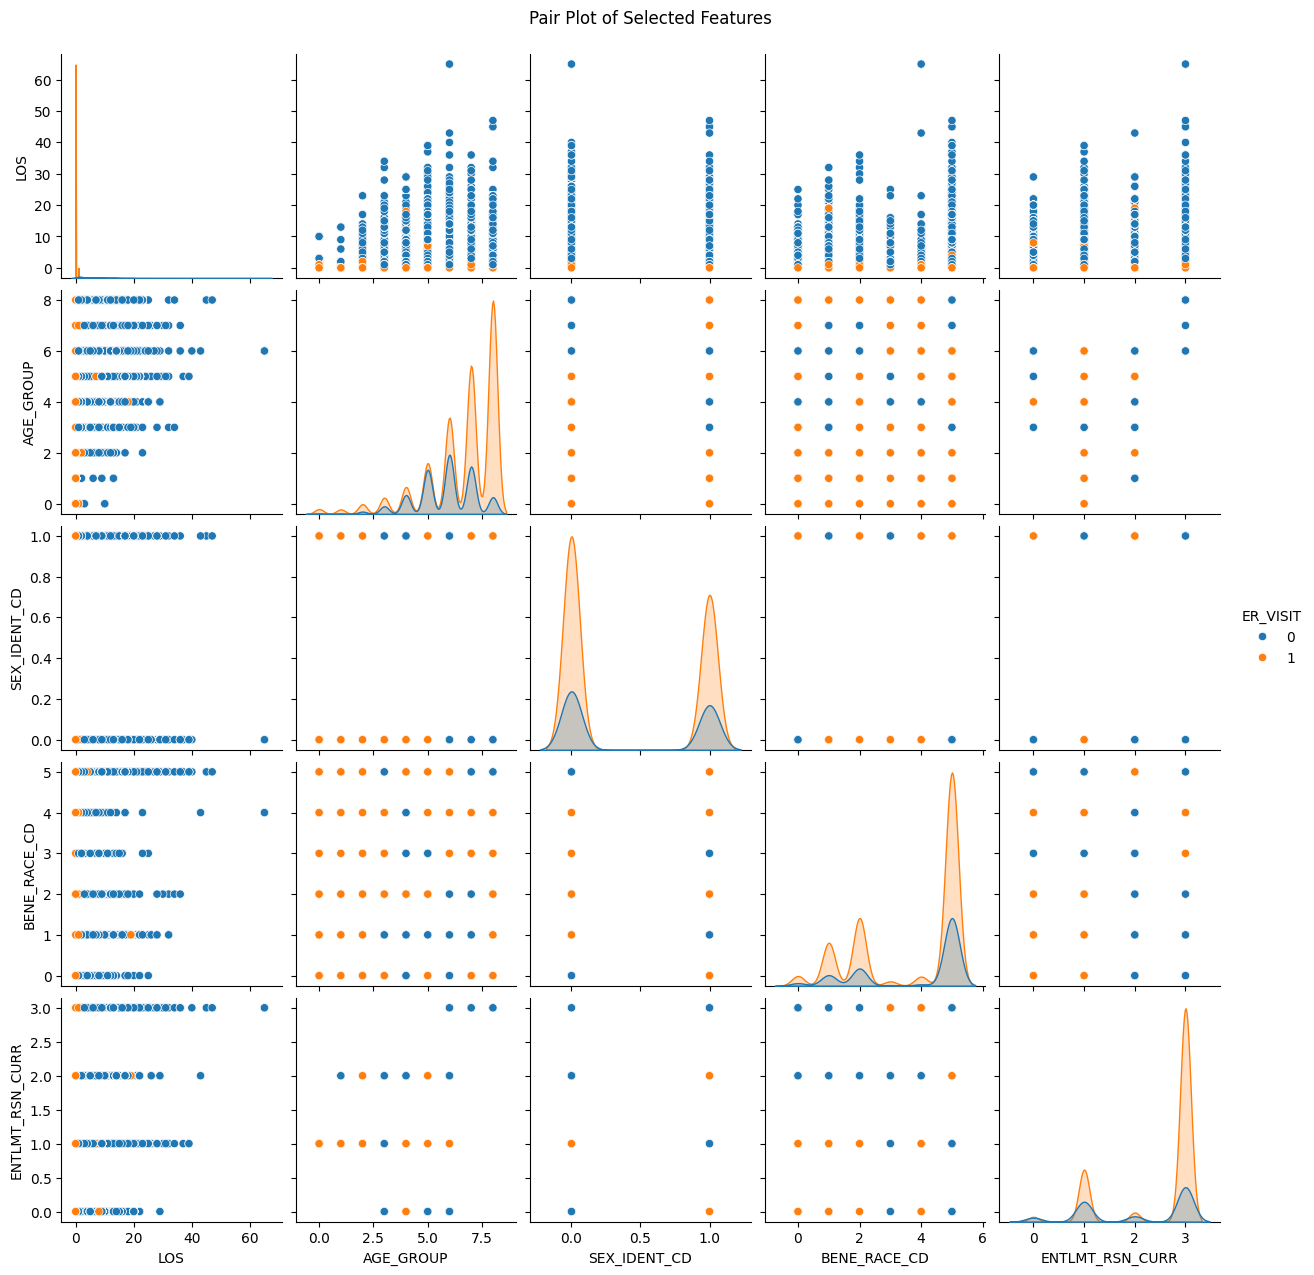

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt

# Step 2: Encode categorical variables
df_plot = merged_df[['LOS', 'AGE_GROUP', 'SEX_IDENT_CD', 'BENE_RACE_CD','ENTLMT_RSN_CURR','ER_VISIT']].copy()
df_plot['AGE_GROUP'] = df_plot['AGE_GROUP'].astype('category').cat.codes
df_plot['SEX_IDENT_CD'] = df_plot['SEX_IDENT_CD'].astype('category').cat.codes
df_plot['BENE_RACE_CD'] = df_plot['BENE_RACE_CD'].astype('category').cat.codes

df_plot['ENTLMT_RSN_CURR'] = df_plot['ENTLMT_RSN_CURR'].astype('category').cat.codes
df_plot['ER_VISIT'] = df_plot['ER_VISIT'].astype(int)

# Step 3: Plot
sns.pairplot(df_plot, diag_kind='kde', hue='ER_VISIT')
plt.suptitle("Pair Plot of Selected Features", y=1.02)
plt.show()

C:\Users\sarad\AppData\Local\Temp\ipykernel_5288\1860876082.py:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.barplot(


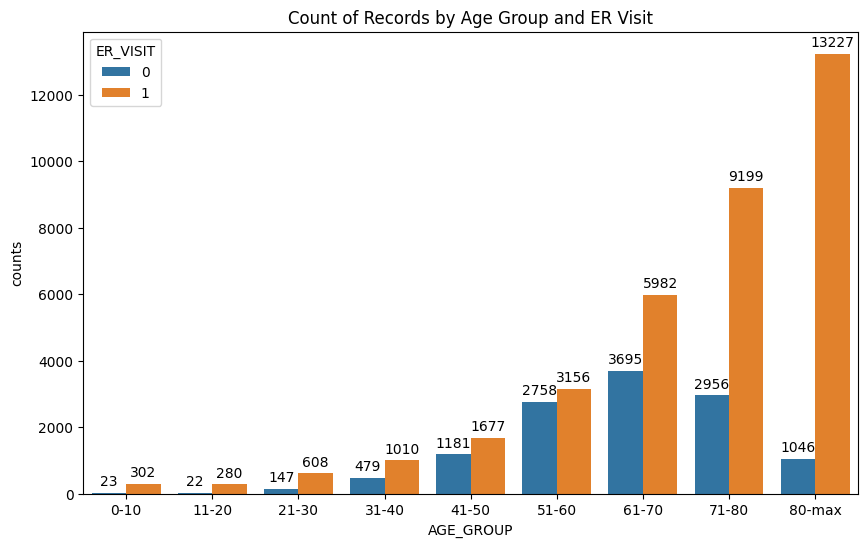

In [9]:
# Step 1: Aggregate counts
df_counts = merged_df.groupby(['AGE_GROUP', 'ER_VISIT']).size().reset_index(name='counts')

# Step 2: Plot
plt.figure(figsize=(10, 6))
ax = sns.barplot(
    x='AGE_GROUP',
    y='counts',
    hue='ER_VISIT',
    data=df_counts,
    ci=None
)
plt.title('Count of Records by Age Group and ER Visit')

# Add value labels
for container in ax.containers:
    ax.bar_label(container, fmt='%d', padding=3)

plt.show()

C:\Users\sarad\AppData\Local\Temp\ipykernel_5288\3042760540.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_icd_los.values, y=top_icd_los.index, palette='viridis')


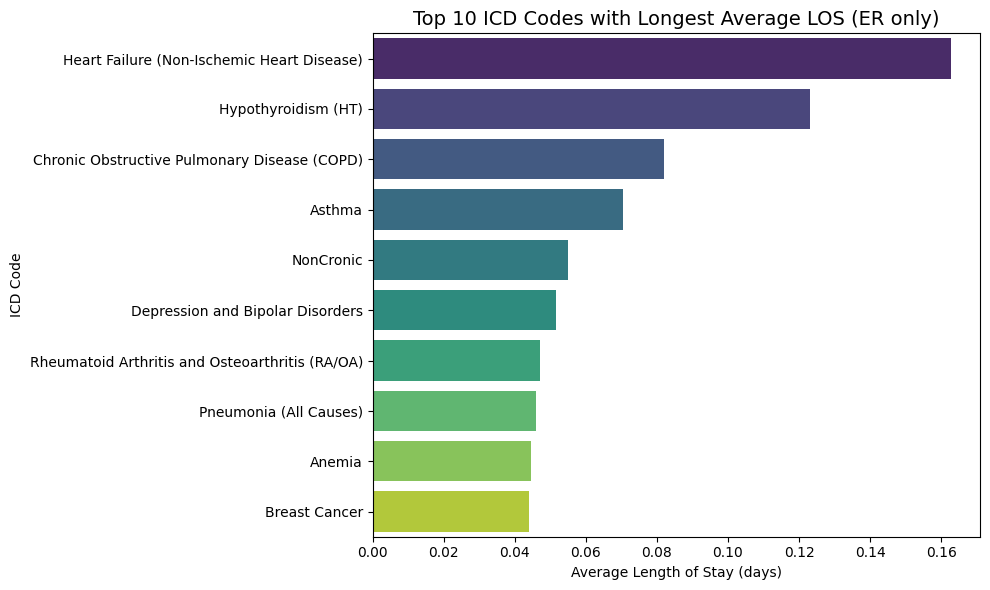

In [10]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Filter only patients who visited ER and have valid LOS
df_er = merged_df[(merged_df['ER_VISIT'] == 1) & (merged_df['LOS'].notnull())]

# Step 2: Melt ICD diagnosis columns into long format
icd_cols = [col for col in df_er.columns if col.startswith('ICD_DGNS_CD')]
df_long = df_er.melt(id_vars=['LOS'], value_vars=icd_cols, 
                     var_name='ICD_Column', value_name='ICD_Code')

# Step 3: Remove missing and non-chronic codes
df_long = df_long.dropna(subset=['ICD_Code'])
df_long = df_long[df_long['ICD_Code'] != 'ICD_NonCronic']  # if stored as string label

# Step 4: Group by ICD code and compute average LOS
avg_los_by_icd = df_long.groupby('ICD_Code')['LOS'].mean().sort_values(ascending=False)

# Step 5: Plot top 10 ICD codes with highest avg LOS
top_icd_los = avg_los_by_icd.head(10)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x=top_icd_los.values, y=top_icd_los.index, palette='viridis')
plt.title('Top 10 ICD Codes with Longest Average LOS (ER only)', fontsize=14)
plt.xlabel('Average Length of Stay (days)')
plt.ylabel('ICD Code')
plt.tight_layout()
plt.show()

In [11]:
merged_df_encoded=pd.read_csv("C:/Users/sarad/Desktop/Project work_final/Data/merged_df_encoded")
merged_df_encoded.head()

,BENE_ID,CLM_ID,CLM_ADMSN_DT,NCH_BENE_DSCHRG_DT,SEX_IDENT_CD,BENE_RACE_CD,ENTLMT_RSN_CURR,STATE_CNTY_FIPS_CD_01,STATE_CNTY_FIPS_CD_02,AGE_GROUP,...,ICD_Hyperlipidemia (HLP),ICD_Hypertension (HTN),ICD_Hypothyroidism (HT),ICD_Ischemic Heart Disease (IHD),ICD_Lung Cancer,ICD_No Abnormality Detected (NAD),ICD_Orthopedic Fracture (With/Without Pathological Fracture),ICD_Pneumonia (All Causes),ICD_Prostate Cancer,ICD_Rheumatoid Arthritis and Osteoarthritis (RA/OA)
0,10000010254618,10000930037831,2015-03-25,2015-03-25,1,White,DIB,1101,1101,21-30,...,1,0,0,0,0,0,0,0,0,0
1,10000010254653,10000930038030,2015-09-24,2015-09-24,2,White,DIB,1081,1081,31-40,...,0,0,0,0,0,0,0,0,0,0
2,10000010254653,10000930038031,2017-05-09,2017-05-10,2,White,DIB,1081,1081,31-40,...,0,0,0,0,0,0,0,0,0,0
3,10000010254656,10000930038162,2017-01-14,2017-01-14,2,White,DIB,1073,1073,21-30,...,0,0,0,0,0,0,0,0,0,0
4,10000010254656,10000930038162,2017-01-14,2017-01-14,2,White,DIB,1073,1073,21-30,...,0,0,0,0,0,0,0,0,0,0


C:\Users\sarad\AppData\Local\Temp\ipykernel_5288\2016227684.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=icd_counts.values, y=icd_counts.index, palette='magma')


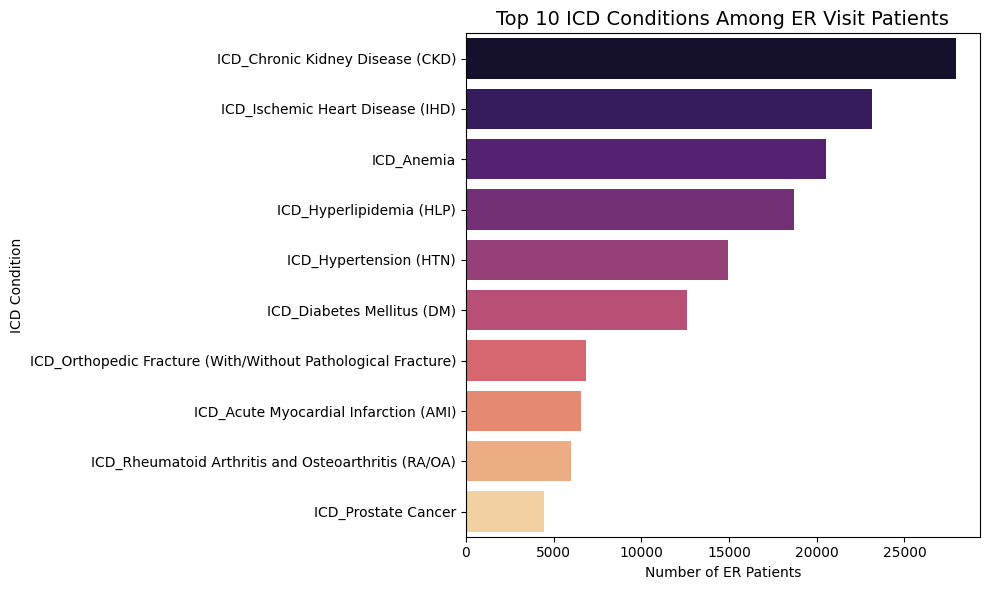

In [12]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Filter only ER visits
df_er = merged_df_encoded[merged_df_encoded['ER_VISIT'] == 1]

# Step 2: Get all ICD one-hot columns
icd_cols = [col for col in df_er.columns if col.startswith('ICD_')]

# Step 3: Sum across all ICD columns for ER patients
icd_counts = df_er[icd_cols].sum().sort_values(ascending=False).head(10)

# Step 4: Plot
plt.figure(figsize=(10, 6))
sns.barplot(x=icd_counts.values, y=icd_counts.index, palette='magma')
plt.title('Top 10 ICD Conditions Among ER Visit Patients', fontsize=14)
plt.xlabel('Number of ER Patients')
plt.ylabel('ICD Condition')
plt.tight_layout()
plt.show()

In [ ]:
merged_df_encoded.columns.tolist()

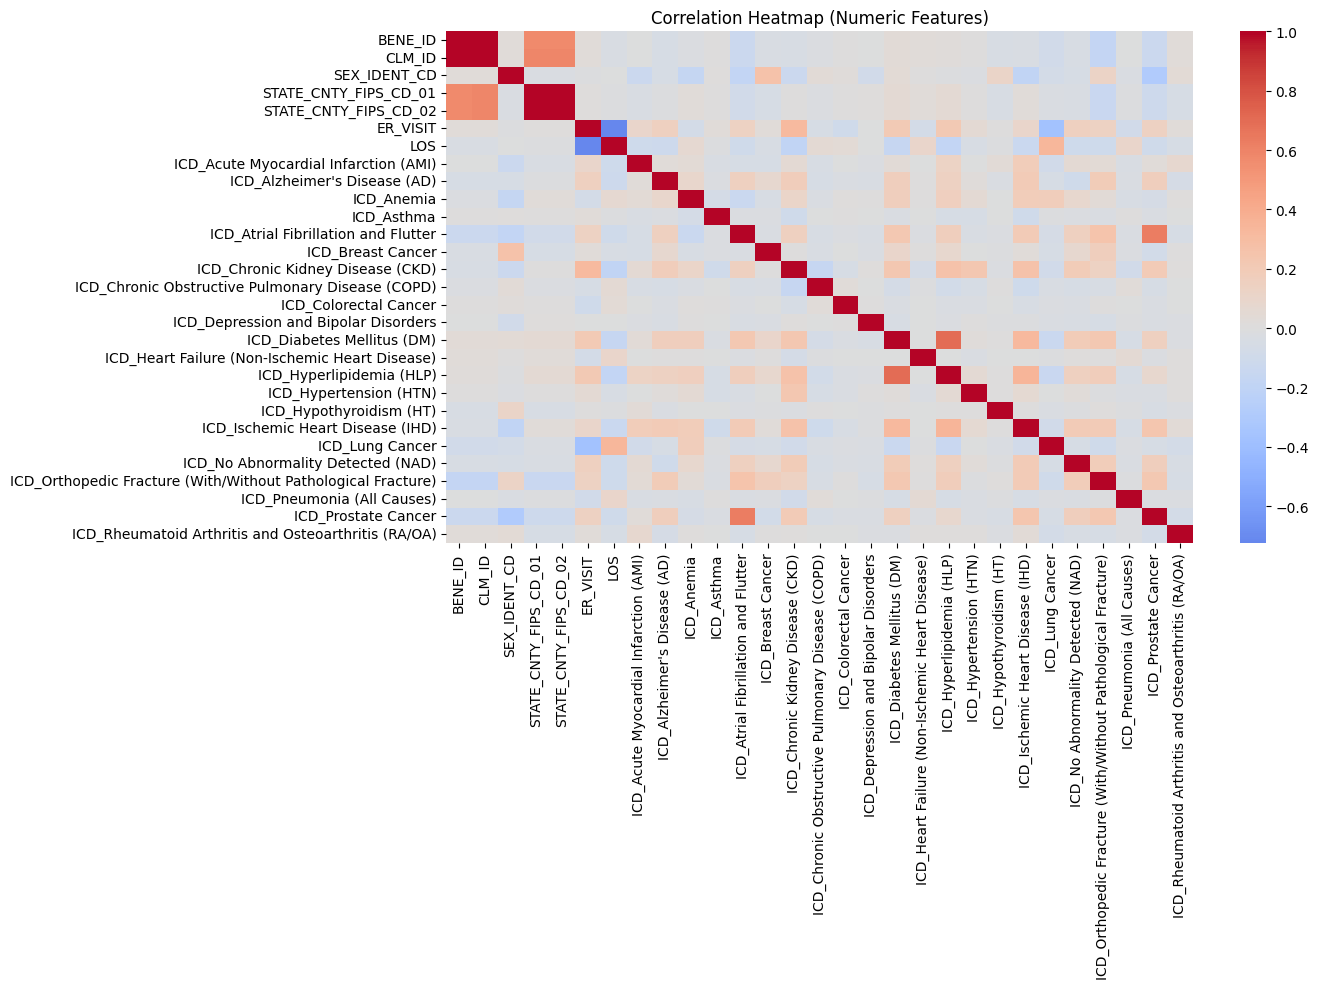

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

# Optional: Select only numeric columns for correlation
numeric_df = merged_df_encoded.select_dtypes(include='number')

# Compute correlation matrix
corr_matrix = numeric_df.corr()

# Plot heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm', center=0)
plt.title("Correlation Heatmap (Numeric Features)")
plt.tight_layout()
plt.show()

<Axes: >

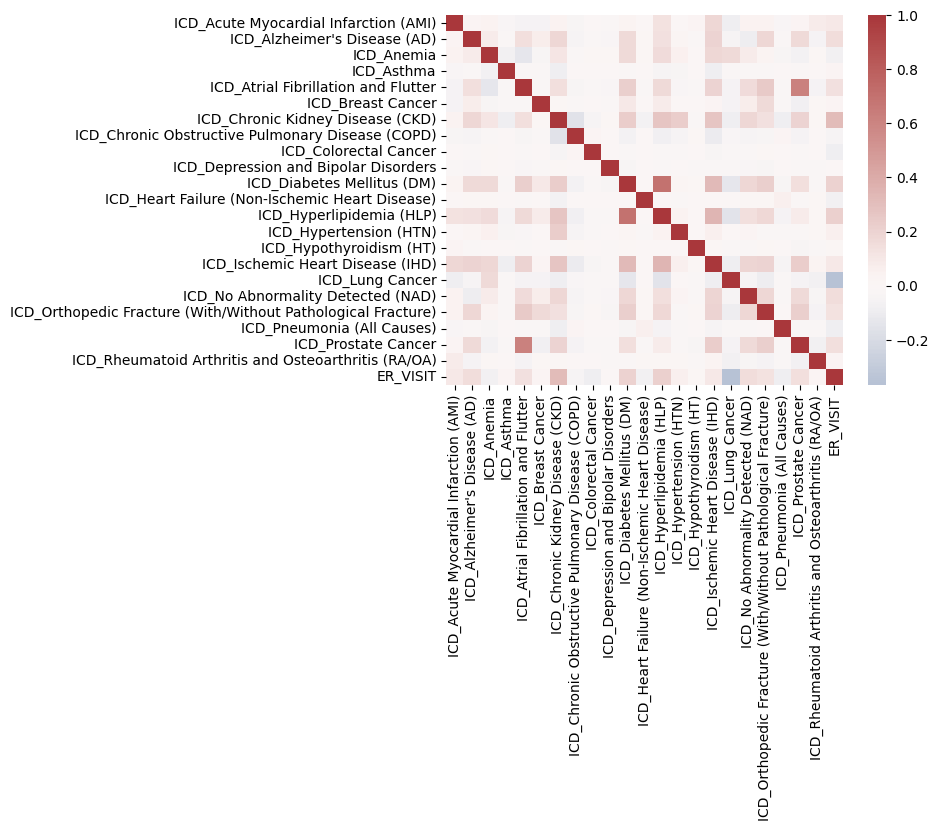

In [15]:
icd_cols = [col for col in merged_df_encoded.columns if col.startswith("ICD_")]
heatmap_df = merged_df_encoded[icd_cols + ['ER_VISIT']]
sns.heatmap(heatmap_df.corr(), cmap='vlag', center=0)

C:\Users\sarad\AppData\Local\Temp\ipykernel_5288\3057352500.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=top_icd_counts.values, y=top_icd_counts.index, palette='Set2')


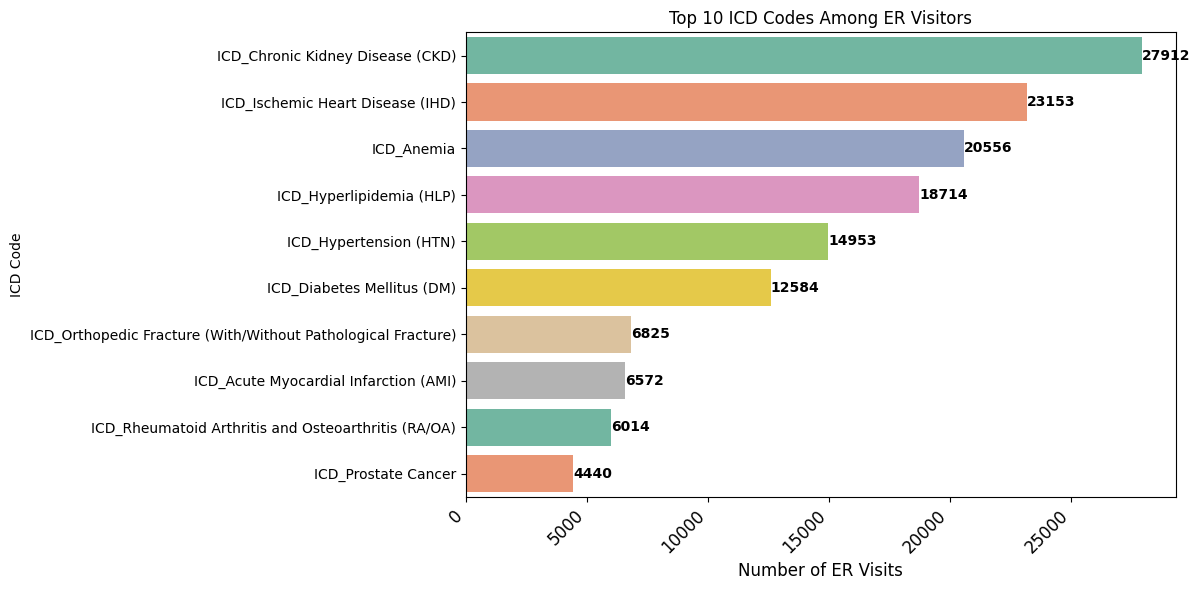

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

# Get ICD columns
icd_cols = [col for col in merged_df_encoded.columns if col.startswith("ICD_")]

# Filter only ER visits
er_only = merged_df_encoded[merged_df_encoded['ER_VISIT'] == 1]

# Count ER visits per ICD code
icd_counts = er_only[icd_cols].sum().sort_values(ascending=False)

# Take top 10 most common ICDs among ER visitors
top_icd_counts = icd_counts.head(10)

# Plot
plt.figure(figsize=(12, 6))
ax = sns.barplot(x=top_icd_counts.values, y=top_icd_counts.index, palette='Set2')
plt.title("Top 10 ICD Codes Among ER Visitors")
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.xlabel("Number of ER Visits", fontsize=12)
plt.ylabel("ICD Code", fontsize=10)

# Add value labels on bars
for i, v in enumerate(top_icd_counts.values):
    ax.text(v + 1, i, str(int(v)), va='center', fontweight='bold', fontsize=10, color='black', ha='left')

plt.tight_layout()
plt.show()

In [ ]:
#H2: Older age groups (75+) are more likely to visit the ER compared to younger age groups (31–64)

In [20]:
import matplotlib.pyplot as plt

# Ensure AGE_GROUP is ordered correctly
age_order = merged_df_encoded['AGE_GROUP'].cat.categories

# 1. ER Visit Rate by Age Group
er_rate = merged_df_encoded.groupby('AGE_GROUP')['ER_VISIT'] \
.mean() \
.reindex(age_order)

# 2. ER Visit Count by Age Group
er_count = merged_df_encoded.groupby('AGE_GROUP')['ER_VISIT'] \
.sum() \
.reindex(age_order)

# Plot side by side
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# a) Proportion plot
bars1 = axes[0].bar(age_order, er_rate, color='skyblue', edgecolor='black')
axes[0].set_title('ER Visit Rate by Age Group')
axes[0].set_ylabel('Proportion of ER Visits')
axes[0].set_ylim(0, 1)
axes[0].tick_params(axis='x', rotation=45)

# Add numbers on top of bars
for bar in bars1:
    yval = bar.get_height()
    axes[0].text(bar.get_x() + bar.get_width()/2, yval + 0.02, round(yval, 2), ha='center', va='bottom')

# b) Count plot
bars2 = axes[1].bar(age_order, er_count, color='salmon', edgecolor='black')
axes[1].set_title('ER Visit Count by Age Group')
axes[1].set_ylabel('Number of ER Visits')
axes[1].tick_params(axis='x', rotation=45)

# Add numbers on top of bars
for bar in bars2:
    yval = bar.get_height()
    axes[1].text(bar.get_x() + bar.get_width()/2, yval + 50, round(yval, 0), ha='center', va='bottom')

plt.tight_layout()
plt.show()

AttributeError: Can only use .cat accessor with a 'category' dtype

In [19]:
df_encoded_all= pd.read_csv('c:/Users/sarad/Desktop/Project work_final/Data/df_encoded_all.csv')
df_encoded_all.head()

,BENE_ID,CLM_ID,CLM_ADMSN_DT,NCH_BENE_DSCHRG_DT,BENE_RACE_CD,STATE_CNTY_FIPS_CD_01,STATE_CNTY_FIPS_CD_02,ER_VISIT,LOS,ICD_Acute Myocardial Infarction (AMI),...,AGE_GROUP_31-40,AGE_GROUP_41-50,AGE_GROUP_51-60,AGE_GROUP_61-70,AGE_GROUP_71-80,AGE_GROUP_80-max,SEX_IDENT_CD_2,ENTLMT_RSN_CURR_DIB,ENTLMT_RSN_CURR_ESRD,ENTLMT_RSN_CURR_DIB ESRD
0,10000010254618,10000930037831,2015-03-25,2015-03-25,White,1101,1101,1,0,0,...,0,0,0,0,0,0,0,1,0,0
1,10000010254653,10000930038030,2015-09-24,2015-09-24,White,1081,1081,1,0,0,...,1,0,0,0,0,0,1,1,0,0
2,10000010254653,10000930038031,2017-05-09,2017-05-10,White,1081,1081,0,1,0,...,1,0,0,0,0,0,1,1,0,0
3,10000010254656,10000930038162,2017-01-14,2017-01-14,White,1073,1073,1,0,0,...,0,0,0,0,0,0,1,1,0,0
4,10000010254656,10000930038162,2017-01-14,2017-01-14,White,1073,1073,1,0,0,...,0,0,0,0,0,0,1,1,0,0
